In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
bench = BenchmarkSet("lcbench", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

Please make sure to also cite:
Zimmer, L., Lindauer, M., & Hutter, F. (2021). Auto-Pytorch: Multi-Fidelity Metalearning for Efficient and Robust AutoDL. IEEE Transactions on Pattern Analysis and Machine Intelligence, 43(9), 3079-3090.
Zimmer, L. (2020). data_2k_lw.zip. figshare. Dataset. https://doi.org/10.6084/m9.figshare.11662422.v1, Apache License, Version 2.0.


In [72]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [73]:
def plot_true_lc(ccs, target):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    fidelity_params = bench.config.fidelity_params[0]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        config = pd.DataFrame(data = x, index = [0])
        config.drop(fidelity_params, axis = 1, inplace=True)
        pdf = df.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(pdf[bench.config.fidelity_params[0]], pdf[target],
                 color = colors[i], marker = "o", linestyle="None", alpha=0.5)

In [74]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

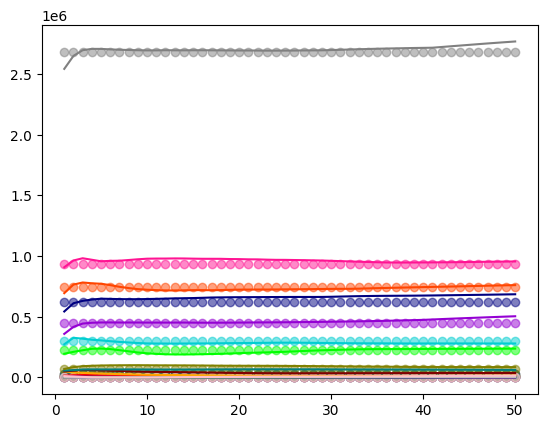

In [89]:
# Draw a sample configuration
ccs = [df.sample(1).to_dict() for i in range(20)]
#target = "auc"
target = "model_parameters"
#fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [87]:
ccs

[{'OpenML_task_id': {600283: 7593},
  'epoch': {600283: 13.0},
  'batch_size': {600283: 156.0},
  'learning_rate': {600283: 0.026487136},
  'momentum': {600283: 0.43056515},
  'weight_decay': {600283: 0.017227663},
  'num_layers': {600283: 2.0},
  'max_units': {600283: 407.0},
  'max_dropout': {600283: 0.41360065},
  'val_accuracy': {600283: 0.5949775},
  'val_cross_entropy': {600283: 0.97801876},
  'val_balanced_accuracy': {600283: 0.6885428},
  'test_accuracy': {600283: 0.59729624},
  'test_cross_entropy': {600283: 1.6734023},
  'test_balanced_accuracy': {600283: 0.69471055},
  'time': {600283: 216.96165},
  'time_increase': {600283: 16.830854},
  'model_parameters': {600283: 25241.0}},
 {'OpenML_task_id': {291273: 126029},
  'epoch': {291273: 25.0},
  'batch_size': {291273: 26.0},
  'learning_rate': {291273: 0.03922392},
  'momentum': {291273: 0.25006613},
  'weight_decay': {291273: 0.016346361},
  'num_layers': {291273: 2.0},
  'max_units': {291273: 201.0},
  'max_dropout': {291273

In [77]:
bench = BenchmarkSet("lcbench", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "val_balanced_accuracy"

Please make sure to also cite:
Zimmer, L., Lindauer, M., & Hutter, F. (2021). Auto-Pytorch: Multi-Fidelity Metalearning for Efficient and Robust AutoDL. IEEE Transactions on Pattern Analysis and Machine Intelligence, 43(9), 3079-3090.
Zimmer, L. (2020). data_2k_lw.zip. figshare. Dataset. https://doi.org/10.6084/m9.figshare.11662422.v1, Apache License, Version 2.0.
False
/home/lps/Phd/yahpo_data/lcbench/model_v2.onnx


In [78]:
def plot_lc_noisy(cc, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
   
    for i in range(len(colors)):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out, seed=i)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

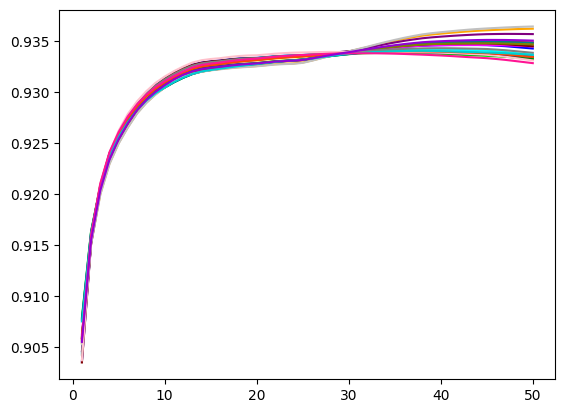

In [82]:
plot_lc_noisy(ccs[0], target, fidelity_sequence)

In [83]:
bench = BenchmarkSet("lcbench", active_session=False, check=False, noisy=True)
bench._get_model_path()

Please make sure to also cite:
Zimmer, L., Lindauer, M., & Hutter, F. (2021). Auto-Pytorch: Multi-Fidelity Metalearning for Efficient and Robust AutoDL. IEEE Transactions on Pattern Analysis and Machine Intelligence, 43(9), 3079-3090.
Zimmer, L. (2020). data_2k_lw.zip. figshare. Dataset. https://doi.org/10.6084/m9.figshare.11662422.v1, Apache License, Version 2.0.


'/home/lps/Phd/yahpo_data/lcbench/model_v2_noisy.onnx'

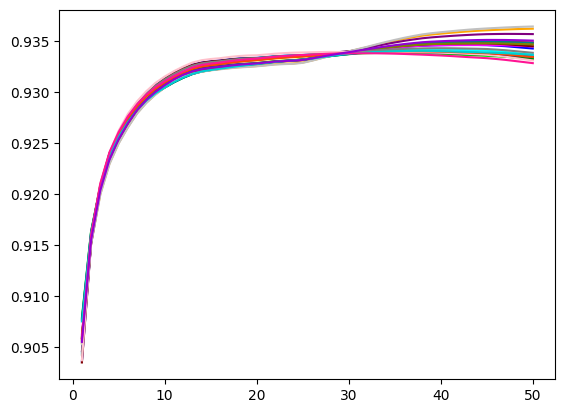

In [84]:
plot_lc_noisy(ccs[0], target, fidelity_sequence)